imports the mnist(Modified National Institute of Standards and Technology database) dataset of handwritten digits.

In [1]:
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

CLASS_NAMES = [f'{number}' for number in range(10)]


In [2]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Shows both the handwritten image data and the corresponding label data.

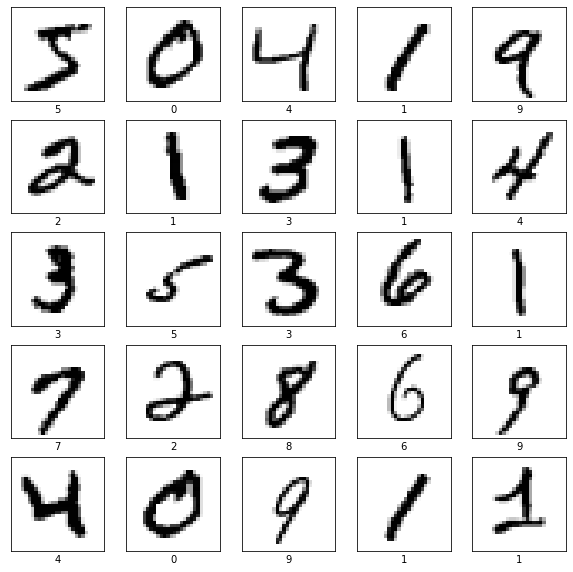

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

In [4]:
tf.config.list_physical_devices('GPU')
model = tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(28,28)),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dropout(0.2),
       tf.keras.layers.Dense(len(CLASS_NAMES))                             
])

In [5]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.03521053, -0.54341024, -0.46945375, -0.14147109, -0.38050956,
        -0.29490384,  0.22783758,  0.05508944, -0.11117276,  0.14050691]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
model.compile(optimizer='adam', 
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:
TRAIN_EPOCHS = 10

Trains the model on the data.

In [9]:
history = model.fit(x_train, y_train, epochs=TRAIN_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2892 - accuracy: 0.9158
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1376 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1033 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9850
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.043

In [10]:
probability_model = tf.keras.Sequential([
           model,
           tf.keras.layers.Softmax()                              
])

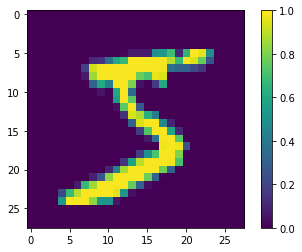

In [11]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.02040346e-07, 5.52853006e-11, 1.33532964e-07, 2.17331180e-05,
        1.46388374e-15, 1.86353901e-08, 1.49611324e-16, 9.99978065e-01,
        6.97476787e-09, 4.41619221e-08],
       [1.29454503e-10, 1.05445752e-05, 9.99989390e-01, 1.23758985e-08,
        2.31222281e-20, 1.29949274e-10, 1.76421389e-09, 3.14759775e-19,
        4.73215189e-10, 6.48588745e-17],
       [4.93889551e-09, 9.99903917e-01, 5.02587864e-06, 6.26281675e-08,
        9.47403805e-06, 6.99567764e-08, 3.39661682e-07, 5.50060140e-05,
        2.59578883e-05, 2.18106710e-09],
       [9.99989748e-01, 7.31359746e-16, 9.74633895e-06, 5.00455322e-09,
        1.40752334e-07, 1.61310126e-07, 1.01814656e-07, 1.25224631e-07,
        3.34574937e-11, 1.79767028e-08],
       [1.39899947e-09, 2.84351332e-14, 8.85498253e-08, 3.80280356e-12,
        9.99883533e-01, 1.45976231e-10, 3.60417918e-09, 7.81524420e-07,
        4.36366776e-10, 1.15460418e-04]], dtype=float32)>

Shows the model's test accuracy.

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9797


[0.07322464883327484, 0.9797000288963318]